# Biblioteki Pythona w analizie danych
### Tomasz Rodak

Lab 4

---



### Zadanie 4.1

Celem tego zadania jest wizualizacja i ocena jakości klasyfikacji na sztucznie wygenerowanych danych dla modeli:
1. regresji logistycznej,
2. LDA,
3. QDA,
4. KNN, 
5. Naiwnego Bayesa.

Podany niżej kod generuje dane z rozkładu normalnego (pod warunkiem klasy) o średnich i macierzach kowariancji kontrolowanych przez użytkownika. 
1. Wykorzystaj go do wygenerowania przykładowych danych.
2. Uzyskane dane podziel na zbiór treningowy i testowy. 
3. Przeprowadź klasyfikację na zbiorze treningowym i ocen jakość klasyfikacji na zbiorze testowym. 
4. W modelach generatywnych sprawdź jak wyglądają wyznaczone przez model średnie i macierze kowariancji w każdej z klas. Czy są one zbliżone do wartości, z których generowano dane? W każdym przypadku zastanów się, jakie są założenia modelu i czy są one spełnione w danych.
5. Przedstaw graficznie granice decyzyjne dla każdego z modeli. Przeprowadź różne eksperymenty, zmieniając parametry generacji danych, takie jak liczba klas, liczba obserwacji w klasie, wartości średnich i macierzy kowariancji.

Do wyznaczania granic decyzyjnych możesz wykorzystać `sklearn.inspection.DecisionBoundariesDisplay`.

---

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ortho_group

def make_random_psd_matrix(eigenvalues, random_rotation=False, seed=None):
    p = len(eigenvalues)
    if random_rotation:
        np.random.seed(seed)
        Q = ortho_group.rvs(p)
    else:
        Q = np.eye(p)
    S = np.diag(eigenvalues)
    return Q @ np.sqrt(S) @ Q.T

def multivariate_normal(n, mu, psd):
    p = len(mu)
    X = np.random.normal(0, 1, (n, p))
    return X @ psd.T + mu

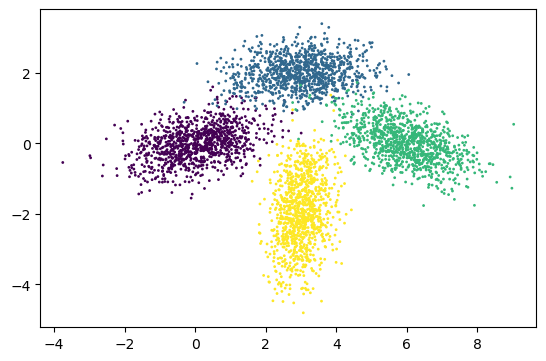

In [3]:
n = [1000, 1000, 1000, 1000] # number of samples per class
lbd = [[1, 0.2], [1, 0.2], [1, 0.2], [1, 0.2]] # eigenvalues of the covariance matrix in each class
mu = [[0, 0], [3, 2], [6, 0], [3, -2]] # mean of the distribution in each class

X, y = np.empty((0, 2)), np.empty(0)
for n_, lbd_, mu_ in zip(n, lbd, mu):
    psd = make_random_psd_matrix(lbd_, random_rotation=True, seed=None)
    X_ = multivariate_normal(n_, mu_, psd)
    X = np.vstack([X, X_])
    y = np.hstack([y, np.full(n_, len(y))])

fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=1, alpha=1)
ax.set_aspect('equal');